Today we are going to be going over a basic R tutorial using music. We need to start by importing all of the necessary packages. I have gone ahead and listed those for you in the code cell below. Make sure you run this first or else nothing else will work. This first cell should be run to install all of the necessary packages onto this coding environment.

In [18]:
options(repr.matrix.max.cols=100, repr.matrix.max.rows=1001)

In [36]:
#im wondering if we can avoid downloading these every time we start our coding environment
install.packages('geniusr')
install.packages('tidytext')
install.packages('ggplot2')
install.packages('dplyr')
install.packages('stringr')
install.packages('textdata')


also installing the dependency ‘rlang’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



Next, we need to include all of the libraries that we will be accessing with the R language. There are tons of different libraries, but we will be using the following three for this assignment. The most important library for this notebook is geniusr. This is what will allow us to access all of the lyrics on the genius website. 

In [115]:
library(rlang)
library(geniusr) 
library(tidyverse)
library(tidytext)
library(ggplot2)
library(dplyr)
library(stringr)
library(textdata)

In order to access the geniusr library, we have to set up an account with them and get an API key. This is never a fun process, so don't feel bad if it takes you a bit to navigate the site. You can sign up here https://genius.com/signup_or_login. For the website URL I linked my jupyter lab and the name of the app was "Homework1". This names are not important, we are just trying to get the API key. Once you have the key, you need to set the GENIUS_API_TOKEN to the API key that you generated. Simply fill in the '' below with your key and run the cell. 

In [62]:
Sys.setenv(GENIUS_API_TOKEN = '6I2y8PmTdL5xU615YndcCaa1wGBuLDQBhkquN8LK6Dp6Uxpekl6WAhe1uPbxciIM')

If everything worked correctly, you should be able to run the next cell and get a big output of all of the metadata that is stored for each song. The song ID can be changed to get all of this metadata for any song on their website.

Getting the song_id can be a little tedius, but that's okay because we do not always need it! We can get the lyrics of a song by knowing the name of it and the name of the artist who created it. Check out the cell below as an example! As you can see, the table is split into several colums already. You might not know it, but this is going to save you A LOT of time because we don't have to "scrub" or manually clean/categorize the data ourself. Now that you know the basic formula, you can get the lyrics of any song you want! Simply replace the artist name and song title with a piece of music that you are interested in and let it run. As a side note, you do not have to worry about capitalization when filling out the artist name and title. Just make sure they are spelled correctly! Make sure that you give a name to the song so that we can add it to a corpus in a little bit! You can do this by putting whatever name you want in front of the function and then adding a "<-". Type the name by itself it view your table.

In [6]:
song1 <- get_lyrics_search(artist_name = "Ice Cube", song_title = "Why We Thugs")
head(song1, 10)

line,section_name,section_artist,song_name,artist_name
<chr>,<chr>,<chr>,<chr>,<chr>
"Yeah, every hood's the same",Intro,Ice Cube,Why We Thugs,Ice Cube
"Every hood's the same, come on",Intro,Ice Cube,Why We Thugs,Ice Cube
They give us guns and drugs,Hook,Ice Cube,Why We Thugs,Ice Cube
Then wonder why in the fuck we thugs,Hook,Ice Cube,Why We Thugs,Ice Cube
They wanna count the slugs,Hook,Ice Cube,Why We Thugs,Ice Cube
Then come around here and fuck with us,Hook,Ice Cube,Why We Thugs,Ice Cube
They give us guns and drugs,Hook,Ice Cube,Why We Thugs,Ice Cube
Then wonder why in the fuck we thugs,Hook,Ice Cube,Why We Thugs,Ice Cube
They wanna count the slugs,Hook,Ice Cube,Why We Thugs,Ice Cube


We can do a lot of fun things once we have the lyrics in this table format called a "tibble". For instance, we can see how many times Kanye says "good morning" on his song "Good Morning". Check this out! As you can see, it was said 18 times! Pretty cool, huh? You can check out the details for unnest_tokens here https://www.rdocumentation.org/packages/tidytext/versions/0.3.0/topics/unnest_tokens.

In [7]:
get_lyrics_search(artist_name = "Kanye West", song_title = "Good Morning") %>% # the %>% symbol here is used to group more complex functions together, you will get used to typing it out
    #this line is splitting all of the lyrics into groups of 2 words.
    #you can unnest by "ngrams" with a specific n to specify how many words
    #you can also unnest by "words" and many other things. Look into the unnest_tokens function if you would like to seperate by something else
    unnest_tokens(bigram, line, token = "ngrams", n = 2) %>%
    #filter is going to make a new table that only contains occurances of "good morning"
    filter(bigram == "good morning") %>%
    #nrow returns the number of rows
    nrow()



[1] 18

I'm going to talk about a few of the functions that we can use, but if you would like to see a full list of the "basics" for this library check out this link https://ewenme.github.io/geniusr/articles/geniusr.html#auth. If you don't want to search by artist name and song name you can simply copy and paste the url from genius.com into the "get_lyrics_url()" function. It will retreive the same data, so do what feels best for you!

In [8]:
# get_artist(artist_name = "kendrick lamar")
head(get_lyrics_url('https://genius.com/Ice-cube-why-we-thugs-lyrics'))

line,section_name,section_artist,song_name,artist_name,song_lyrics_url
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
"Yeah, every hood's the same",Intro,Ice Cube,Why We Thugs,Ice Cube,https://genius.com/Ice-cube-why-we-thugs-lyrics
"Every hood's the same, come on",Intro,Ice Cube,Why We Thugs,Ice Cube,https://genius.com/Ice-cube-why-we-thugs-lyrics
They give us guns and drugs,Hook,Ice Cube,Why We Thugs,Ice Cube,https://genius.com/Ice-cube-why-we-thugs-lyrics
Then wonder why in the fuck we thugs,Hook,Ice Cube,Why We Thugs,Ice Cube,https://genius.com/Ice-cube-why-we-thugs-lyrics
They wanna count the slugs,Hook,Ice Cube,Why We Thugs,Ice Cube,https://genius.com/Ice-cube-why-we-thugs-lyrics
Then come around here and fuck with us,Hook,Ice Cube,Why We Thugs,Ice Cube,https://genius.com/Ice-cube-why-we-thugs-lyrics


Now you try! Take one of your favorite songs that's on genius and try to get the tibble with the lyrics to show. you can comment out the function that you DO NOT use with a "#" (no quotes)

In [20]:
get_lyrics_search(artist_name = "", song_title = "")
get_lyrics_url('')

ERROR: Error in open.connection(x, "rb"): HTTP error 404.


Now that we understand the basics of loading in a song, we can combine a bunch of them together to make a corpus! I'm going to be using the url function, but this will also work with the search function if you prefer that! I'm going to create a corpus of some Mac Miller songs because I miss him dearly :(. This template would be great if you wanted to combine an entire album together for analysis! We are loading a bunch of songs into data frames, and then we use rbind to combine the dataframes together. You can see the new table of songs below.

This is a sentiment analysis of mac millers albums. it will take a while to run. look in the bottom left of the screen and if you see "R | Busy" the code is still running in the background. Wait until it says "R | Idle". Also, remember that copy (Ctrl C / Cmd C) and paste (Ctrl V / Cmd V) are your best friend when making these albums. It's redundant to type a variavble name over and over. Start with something like "nameOfAlbum <- get_lyrics_url('')" and then you can paste a bunch of them quickly and then index like I have done below. It's a whole let less typing.

In [10]:
kids1 <- get_lyrics_url('https://genius.com/Mac-miller-kickin-incredibly-dope-shit-intro-lyrics')
kids2 <- get_lyrics_url('https://genius.com/Mac-miller-outside-lyrics')
kids3 <- get_lyrics_url('https://genius.com/Mac-miller-get-em-up-lyrics')
kids4 <- get_lyrics_url('https://genius.com/Mac-miller-nikes-on-my-feet-lyrics')
kids5 <- get_lyrics_url('https://genius.com/Mac-miller-senior-skip-day-lyrics')
kids6 <- get_lyrics_url('https://genius.com/Mac-miller-the-spins-lyrics')
kids7 <- get_lyrics_url('https://genius.com/Mac-miller-traffic-in-the-sky-lyrics')
kids8 <- get_lyrics_url('https://genius.com/Mac-miller-dont-mind-if-i-do-lyrics')
kids9 <- get_lyrics_url('https://genius.com/Mac-miller-paper-route-lyrics')
kids10 <- get_lyrics_url('https://genius.com/Mac-miller-good-evening-lyrics')
kids11 <- get_lyrics_url('https://genius.com/Mac-miller-ride-around-lyrics')
kids12 <- get_lyrics_url('https://genius.com/Mac-miller-knock-knock-lyrics')
kids13 <- get_lyrics_url('https://genius.com/Mac-miller-mad-flava-heavy-flow-interlude-lyrics')
kids14 <- get_lyrics_url('https://genius.com/Mac-miller-kool-aid-and-frozen-pizza-lyrics')
kids15 <- get_lyrics_url('https://genius.com/Mac-miller-all-i-want-is-you-lyrics')
kids16 <- get_lyrics_url('https://genius.com/Mac-miller-poppy-lyrics')
kids17 <- get_lyrics_url('https://genius.com/Mac-miller-face-in-the-crowd-lyrics')
kids18 <- get_lyrics_url('https://genius.com/Mac-miller-la-la-la-la-lyrics')

kids <- rbind(kids1, kids2, kids3, kids4, kids5, kids6, kids7, kids8, kids9, kids10, kids11, kids12, kids13, kids14, kids15, kids16, kids17, kids18)

bde1 <- get_lyrics_url('https://genius.com/Mac-miller-best-day-ever-lyrics')
bde2 <- get_lyrics_url('https://genius.com/Mac-miller-get-up-lyrics')
bde3 <- get_lyrics_url('https://genius.com/Mac-miller-donald-trump-lyrics')
bde4 <- get_lyrics_url('https://genius.com/Mac-miller-oy-vey-lyrics')
bde5 <- get_lyrics_url('https://genius.com/Mac-miller-ill-be-there-lyrics')
bde6 <- get_lyrics_url('https://genius.com/Mac-miller-wear-my-hat-lyrics')
bde7 <- get_lyrics_url('https://genius.com/Mac-miller-wake-up-lyrics')
bde8 <- get_lyrics_url('https://genius.com/Mac-miller-all-around-the-world-lyrics')
bde9 <- get_lyrics_url('https://genius.com/Mac-miller-down-the-rabbit-hole-lyrics')
bde10 <- get_lyrics_url('https://genius.com/Mac-miller-in-the-air-lyrics')
bde11 <- get_lyrics_url('https://genius.com/Mac-miller-play-ya-cards-lyrics')
bde12 <- get_lyrics_url('https://genius.com/Mac-miller-she-said-lyrics')
bde13 <- get_lyrics_url('https://genius.com/Mac-miller-life-aint-easy-lyrics')
bde14 <- get_lyrics_url('https://genius.com/Mac-miller-snooze-lyrics')
bde15 <- get_lyrics_url('https://genius.com/Mac-miller-keep-floatin-lyrics')
bde16 <- get_lyrics_url('https://genius.com/Mac-miller-bde-bonus-lyrics')

bestDayEver <- rbind(bde1, bde2, bde3, bde4, bde5, bde6, bde7, bde8, bde9, bde10, bde11, bde12, bde13, bde14, bde15, bde16)

swimming1 <- get_lyrics_url('https://genius.com/Mac-miller-come-back-to-earth-lyrics')
swimming2 <- get_lyrics_url('https://genius.com/Mac-miller-hurt-feelings-lyrics')
swimming3 <- get_lyrics_url('https://genius.com/Mac-miller-whats-the-use-lyrics')
swimming4 <- get_lyrics_url('https://genius.com/Mac-miller-perfecto-lyrics')
swimming5 <- get_lyrics_url('https://genius.com/Mac-miller-self-care-lyrics')
swimming6 <- get_lyrics_url('https://genius.com/Mac-miller-wings-lyrics')
swimming7 <- get_lyrics_url('https://genius.com/Mac-miller-ladders-lyrics')
swimming8 <- get_lyrics_url('https://genius.com/Mac-miller-small-worlds-lyrics')
swimming9 <- get_lyrics_url('https://genius.com/Mac-miller-conversation-pt-1-lyrics')
swimming10 <- get_lyrics_url('https://genius.com/Mac-miller-dunno-lyrics')
swimming11 <- get_lyrics_url('https://genius.com/Mac-miller-jet-fuel-lyrics')
swimming12 <- get_lyrics_url('https://genius.com/Mac-miller-2009-lyrics')
swimming13 <- get_lyrics_url('https://genius.com/Mac-miller-so-it-goes-lyrics')

swimming <- rbind(swimming1, swimming2, swimming3, swimming4, swimming5, swimming6, swimming7, swimming8, swimming9, swimming10, swimming11, swimming12, swimming13)


In [11]:
#quick check to make sure it worked
head(kids)
head(bestDayEver)
head(swimming)

line,section_name,section_artist,song_name,artist_name,song_lyrics_url
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
"When you're young, not much matters",Intro,Telly & Mac Miller,Kickin’ Incredibly Dope Shit (Intro),Mac Miller,https://genius.com/Mac-miller-kickin-incredibly-dope-shit-intro-lyrics
"When you find something that you care about, then that's all you got",Intro,Telly & Mac Miller,Kickin’ Incredibly Dope Shit (Intro),Mac Miller,https://genius.com/Mac-miller-kickin-incredibly-dope-shit-intro-lyrics
"When you go to sleep at night, you dream of music",Intro,Telly & Mac Miller,Kickin’ Incredibly Dope Shit (Intro),Mac Miller,https://genius.com/Mac-miller-kickin-incredibly-dope-shit-intro-lyrics
"When you wake up, it's the same thing",Intro,Telly & Mac Miller,Kickin’ Incredibly Dope Shit (Intro),Mac Miller,https://genius.com/Mac-miller-kickin-incredibly-dope-shit-intro-lyrics
"It's there in your face, you can't escape it",Intro,Telly & Mac Miller,Kickin’ Incredibly Dope Shit (Intro),Mac Miller,https://genius.com/Mac-miller-kickin-incredibly-dope-shit-intro-lyrics
Sometimes when you're young,Intro,Telly & Mac Miller,Kickin’ Incredibly Dope Shit (Intro),Mac Miller,https://genius.com/Mac-miller-kickin-incredibly-dope-shit-intro-lyrics


line,section_name,section_artist,song_name,artist_name,song_lyrics_url
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
I never take a day off,Verse 1,Mac Miller,Best Day Ever,Mac Miller,https://genius.com/Mac-miller-best-day-ever-lyrics
"Work around the clock, my engineer gettin' paid off",Verse 1,Mac Miller,Best Day Ever,Mac Miller,https://genius.com/Mac-miller-best-day-ever-lyrics
"Rock like Aesop, light the weed and take off",Verse 1,Mac Miller,Best Day Ever,Mac Miller,https://genius.com/Mac-miller-best-day-ever-lyrics
So high I cannot see: Adolf,Verse 1,Mac Miller,Best Day Ever,Mac Miller,https://genius.com/Mac-miller-best-day-ever-lyrics
Now I got these rappers all breakin' up a sweat,Verse 1,Mac Miller,Best Day Ever,Mac Miller,https://genius.com/Mac-miller-best-day-ever-lyrics
"'Cause every time I get up on the mic, it come correct",Verse 1,Mac Miller,Best Day Ever,Mac Miller,https://genius.com/Mac-miller-best-day-ever-lyrics


line,section_name,section_artist,song_name,artist_name,song_lyrics_url
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
My regrets look just like texts I shouldn't send,Chorus,Mac Miller,Come Back to Earth,Mac Miller,https://genius.com/Mac-miller-come-back-to-earth-lyrics
"And I got neighbors, they're more like strangers",Chorus,Mac Miller,Come Back to Earth,Mac Miller,https://genius.com/Mac-miller-come-back-to-earth-lyrics
We could be friends,Chorus,Mac Miller,Come Back to Earth,Mac Miller,https://genius.com/Mac-miller-come-back-to-earth-lyrics
I just need a way out,Chorus,Mac Miller,Come Back to Earth,Mac Miller,https://genius.com/Mac-miller-come-back-to-earth-lyrics
Of my head,Chorus,Mac Miller,Come Back to Earth,Mac Miller,https://genius.com/Mac-miller-come-back-to-earth-lyrics
I'll do anything for a way out,Chorus,Mac Miller,Come Back to Earth,Mac Miller,https://genius.com/Mac-miller-come-back-to-earth-lyrics


We need to read in this afinn file so that we can do some basic filtering with R. We are giving each column a name as well!

In [18]:
afinn <- read.delim("afinn.txt", header = FALSE)
colnames(afinn)[1] <- "word"
colnames(afinn)[2] <- "score"
head(afinn)
# get_sentiments("afinn")

,word,score
,<chr>,<int>
1,abandon,-2
2,abandoned,-2
3,abandons,-2
4,abducted,-2
5,abduction,-2
6,abductions,-2


This next cell is an example of filtering. We are using unnest_tokens to get each word by itself so that it can be compared with all of the words in the afinn list. After we filter out arbitrary words we can merge the filtered table with the afinn table so that the scored from afinn are added to each word in the song.

In [56]:
split_kids <- unnest_tokens(tbl = kids, output = word, input = line, token = "words", to_lower = TRUE)
filtered_kids <- filter(split_kids, word %in% afinn$word)

split_swimming <- unnest_tokens(tbl = swimming, output = word, input = line, token = "words", to_lower = TRUE)
filtered_swimming <- filter(split_swimming, word %in% afinn$word)

split_bde <- unnest_tokens(tbl = bestDayEver, output = word, input = line, token = "words", to_lower = TRUE)
filtered_bde <- filter(split_bde, word %in% afinn$word)

head(filtered_kids)
head(filtered_swimming)
head(filtered_bde)

kids_afinn <- merge(filtered_kids, afinn, by = "word", all.x = TRUE)

bde_afinn <- merge(filtered_bde, afinn, by = "word", all.x = TRUE)

swimming_afinn <- merge(filtered_swimming, afinn, by = "word", all.x = TRUE)

section_name,section_artist,song_name,artist_name,song_lyrics_url,word
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Intro,Telly & Mac Miller,Kickin’ Incredibly Dope Shit (Intro),Mac Miller,https://genius.com/Mac-miller-kickin-incredibly-dope-shit-intro-lyrics,matters
Intro,Telly & Mac Miller,Kickin’ Incredibly Dope Shit (Intro),Mac Miller,https://genius.com/Mac-miller-kickin-incredibly-dope-shit-intro-lyrics,care
Intro,Telly & Mac Miller,Kickin’ Incredibly Dope Shit (Intro),Mac Miller,https://genius.com/Mac-miller-kickin-incredibly-dope-shit-intro-lyrics,dream
Intro,Telly & Mac Miller,Kickin’ Incredibly Dope Shit (Intro),Mac Miller,https://genius.com/Mac-miller-kickin-incredibly-dope-shit-intro-lyrics,escape
Intro,Telly & Mac Miller,Kickin’ Incredibly Dope Shit (Intro),Mac Miller,https://genius.com/Mac-miller-kickin-incredibly-dope-shit-intro-lyrics,love
Intro,Telly & Mac Miller,Kickin’ Incredibly Dope Shit (Intro),Mac Miller,https://genius.com/Mac-miller-kickin-incredibly-dope-shit-intro-lyrics,shit


section_name,section_artist,song_name,artist_name,song_lyrics_url,word
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Chorus,Mac Miller,Come Back to Earth,Mac Miller,https://genius.com/Mac-miller-come-back-to-earth-lyrics,regrets
Chorus,Mac Miller,Come Back to Earth,Mac Miller,https://genius.com/Mac-miller-come-back-to-earth-lyrics,like
Chorus,Mac Miller,Come Back to Earth,Mac Miller,https://genius.com/Mac-miller-come-back-to-earth-lyrics,like
Verse,Mac Miller,Come Back to Earth,Mac Miller,https://genius.com/Mac-miller-come-back-to-earth-lyrics,like
Verse,Mac Miller,Come Back to Earth,Mac Miller,https://genius.com/Mac-miller-come-back-to-earth-lyrics,yeah
Verse,Mac Miller,Come Back to Earth,Mac Miller,https://genius.com/Mac-miller-come-back-to-earth-lyrics,hell


section_name,section_artist,song_name,artist_name,song_lyrics_url,word
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Verse 1,Mac Miller,Best Day Ever,Mac Miller,https://genius.com/Mac-miller-best-day-ever-lyrics,like
Verse 1,Mac Miller,Best Day Ever,Mac Miller,https://genius.com/Mac-miller-best-day-ever-lyrics,best
Verse 1,Mac Miller,Best Day Ever,Mac Miller,https://genius.com/Mac-miller-best-day-ever-lyrics,fresh
Verse 1,Mac Miller,Best Day Ever,Mac Miller,https://genius.com/Mac-miller-best-day-ever-lyrics,big
Verse 1,Mac Miller,Best Day Ever,Mac Miller,https://genius.com/Mac-miller-best-day-ever-lyrics,nice
Verse 1,Mac Miller,Best Day Ever,Mac Miller,https://genius.com/Mac-miller-best-day-ever-lyrics,yes


After we merge the tables together we can get their afinn score and graph it! Are these what you expected or not? I didn't expect the outcome that I got for my afinn_score and frankly I don't agree with it. This is one of the limitations of data science. It is hard to interpret the connotation of words, especially in rap music. The afinn lexicon considers words that may be "positively" in rap music as negative words because they are common "curse words" in the English language. We are in need of a filtering lexicon that better understands the connotation of words in association with rap music.

,sum,album_names
,<chr>,<chr>
kids_sum,-115,Kids
bde_sum,66,Best Day Ever
swimming_sum,105,Swimming


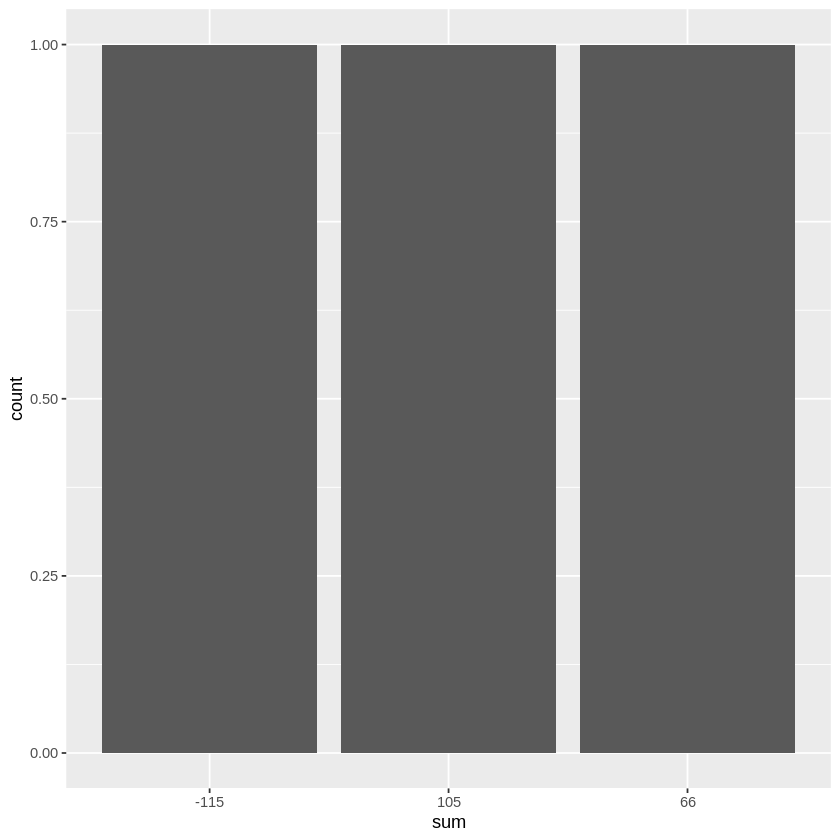

In [118]:
kids_sum <- sum(kids_afinn$score)
bde_sum <- sum(bde_afinn$score)
swimming_sum <- sum(swimming_afinn$score)

album_sums <- rbind(kids_sum, bde_sum, swimming_sum)
colnames(album_sums)[1] <- 'sum'

album_names = c("Kids", 'Best Day Ever', 'Swimming')
album_sums <- cbind(album_sums, album_names)

colnames(album_sums)[1] <- 'sum'
album_sums <- as.data.frame(album_sums)
album_sums

#still trying to figure out how to plot this correctly
sums_graph <- ggplot(album_sums, aes(sum)) +
    geom_bar()
sums_graph

After you have made your corpus you can start to make some graphs out of it! We will be using ggplot2 to do this. Most of the time we need to unnest_tokens if we are looking at word frequency.

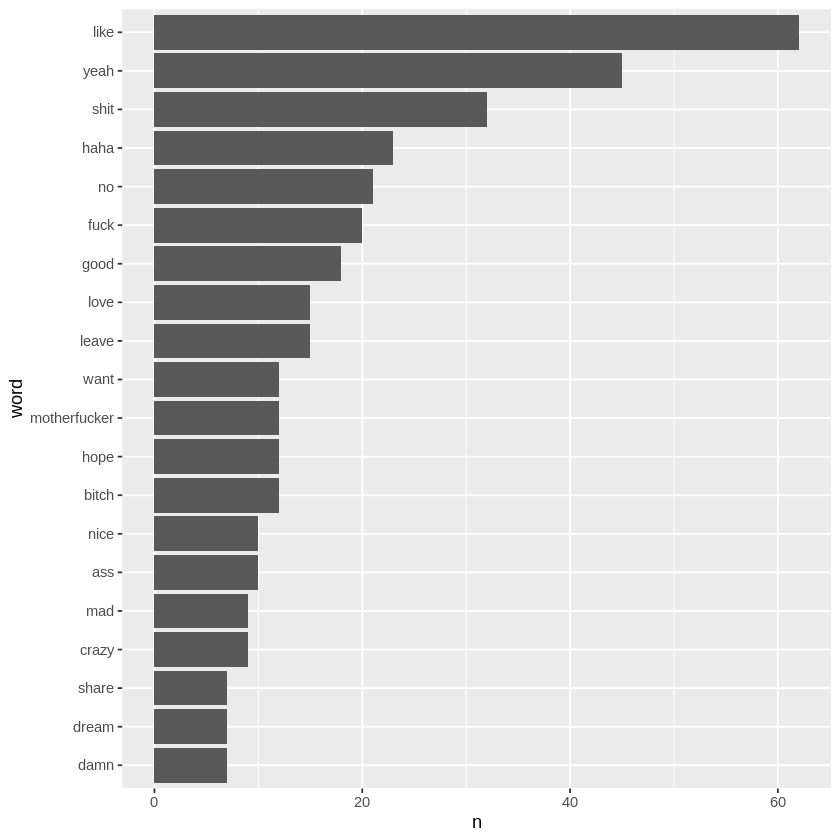

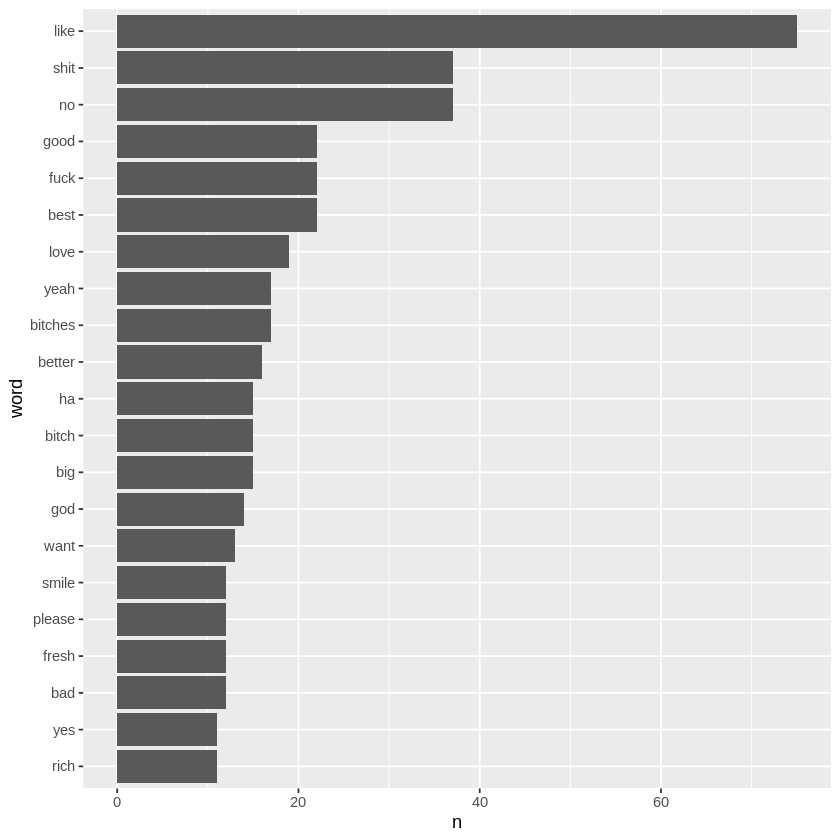

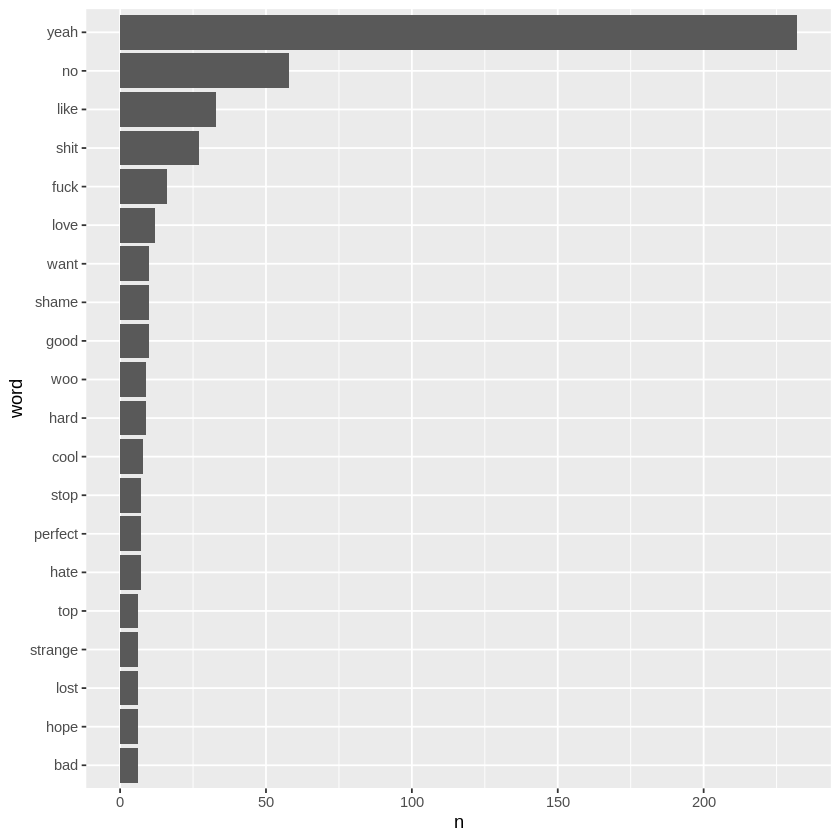

In [117]:
kids_count <- count(filtered_kids, word, sort = TRUE) %>% top_n(20, wt = n) %>% mutate(word = reorder(word,n))

bde_count <- count(filtered_bde, word, sort = TRUE) %>% top_n(20, wt = n) %>% mutate(word = reorder(word,n))

swimming_count <- count(filtered_swimming, word, sort = TRUE) %>% top_n(20, wt = n) %>% mutate(word = reorder(word,n))

kids_graph <- ggplot(kids_count, aes(n,word)) +
    geom_col()
kids_graph

bde_graph <- ggplot(bde_count, aes(n,word)) +
    geom_col()
bde_graph

swimming_graph <- ggplot(swimming_count, aes(n,word)) +
    geom_col()
swimming_graph

This is what our graph would have looked like if we did not filter out any words, as you can see it's hard to gain any knowledge from the 3 graphs below. 

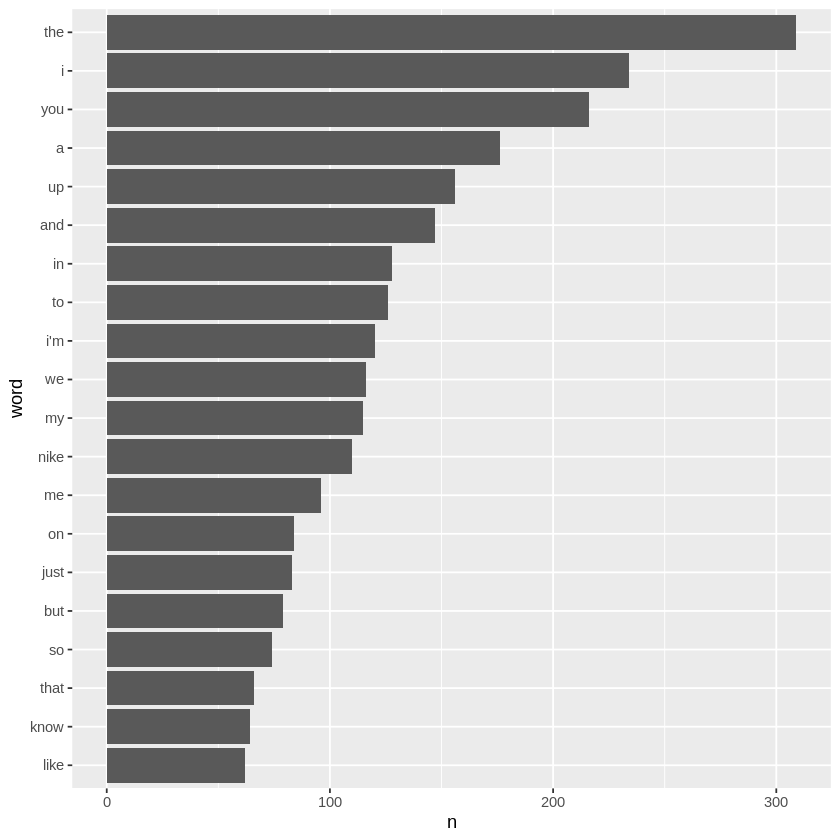

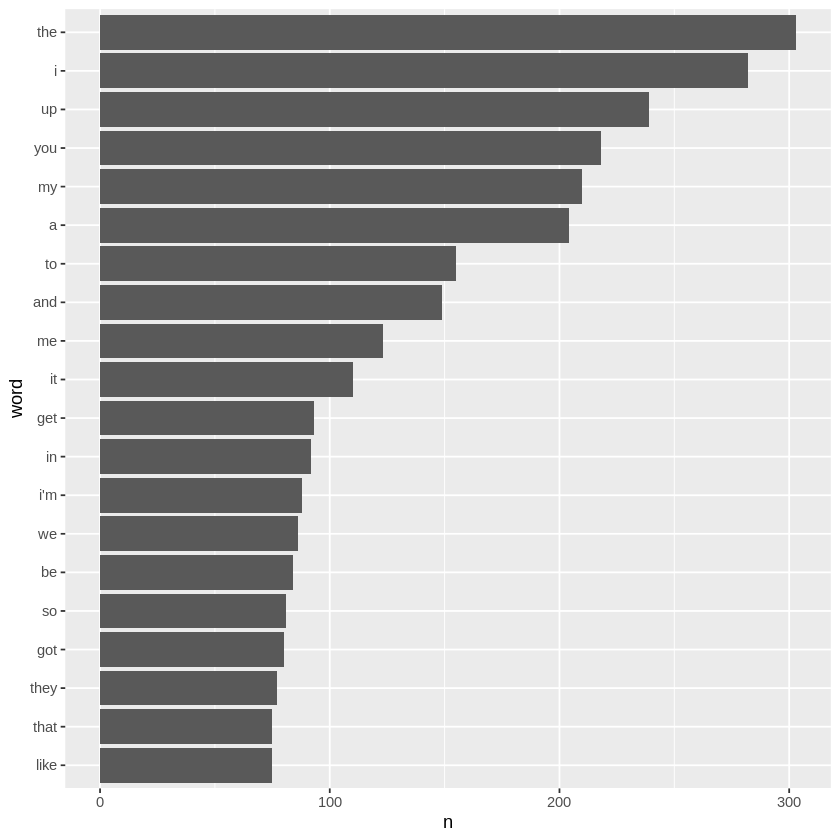

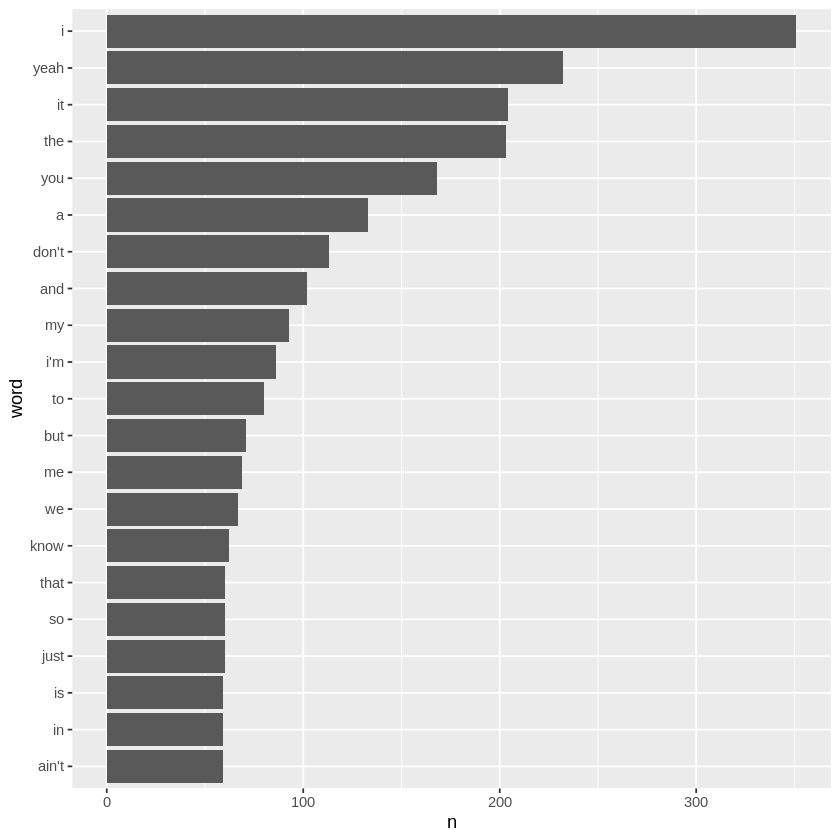

In [53]:
kids_count <- count(split_kids, word, sort = TRUE) %>% top_n(20, wt = n) %>% mutate(word = reorder(word,n))

bde_count <- count(split_bde, word, sort = TRUE) %>% top_n(20, wt = n) %>% mutate(word = reorder(word,n))

swimming_count <- count(split_swimming, word, sort = TRUE) %>% top_n(20, wt = n) %>% mutate(word = reorder(word,n))

kids_graph <- ggplot(kids_count, aes(n,word)) +
    geom_col()
kids_graph

bde_graph <- ggplot(bde_count, aes(n,word)) +
    geom_col()
bde_graph

swimming_graph <- ggplot(swimming_count, aes(n,word)) +
    geom_col()
swimming_graph

we can also use bigrams! Filtering out words for bigrams might not be your best bet. Sometimes it's better to leave the "connector" words that get filtered out if we want to look at strings of words rather than just 1 word.

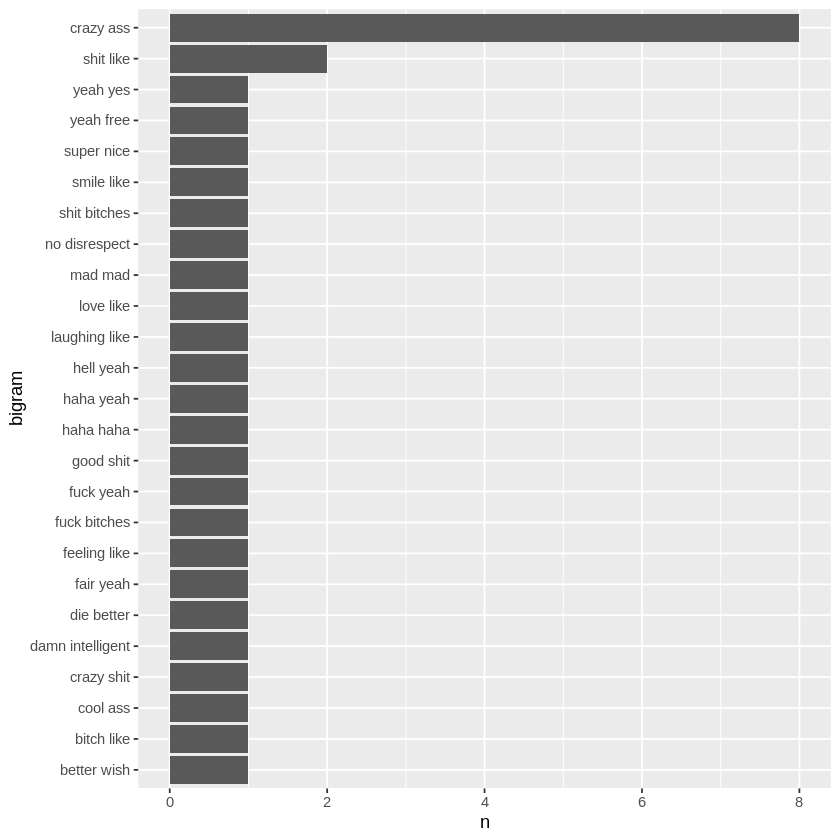

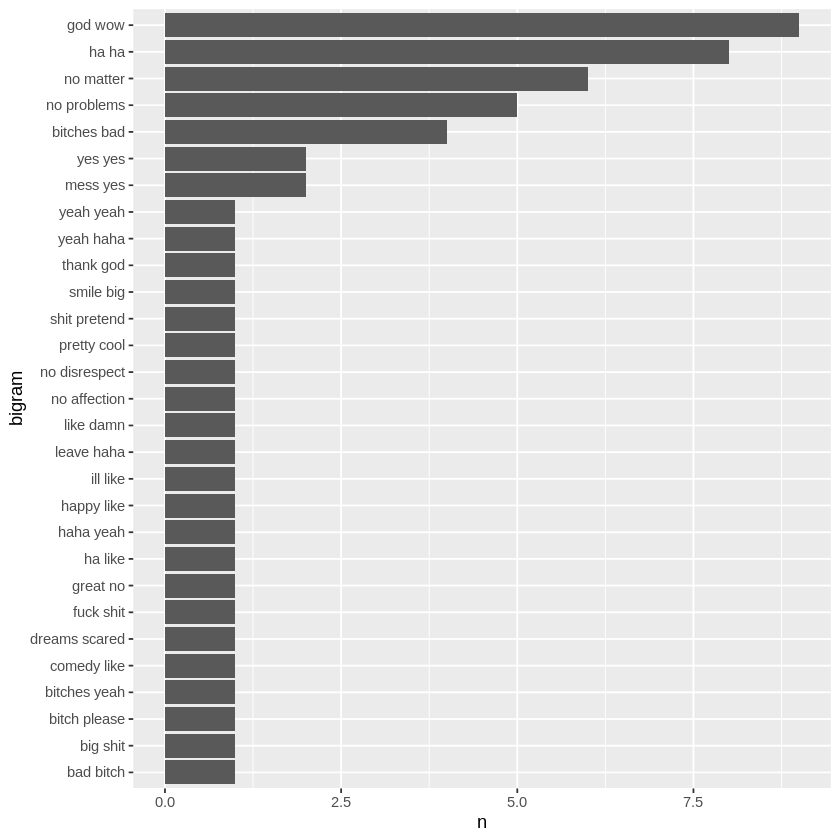

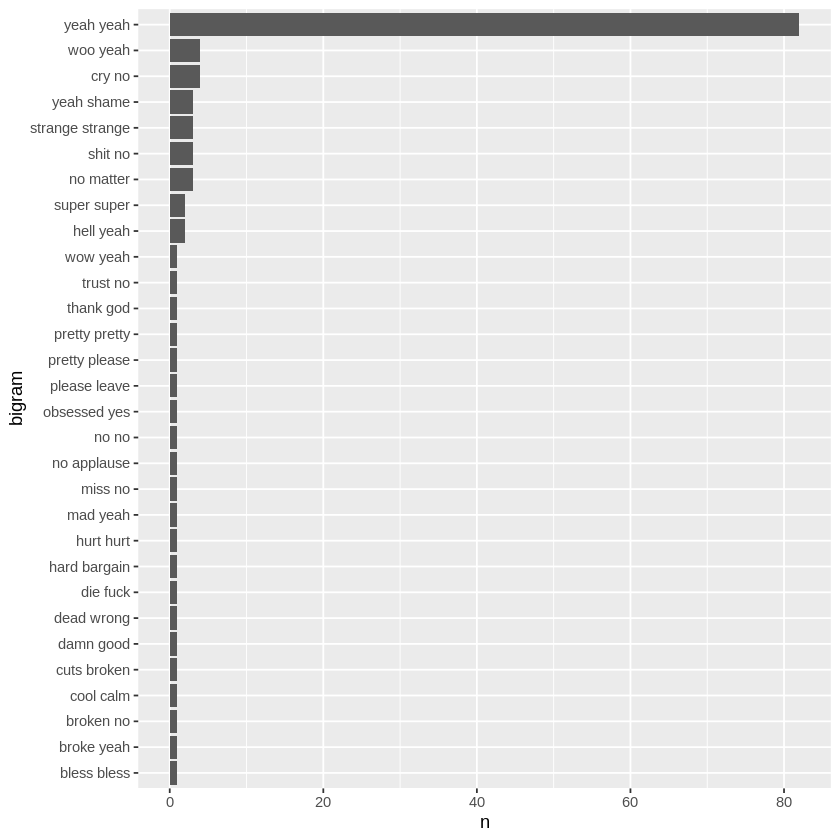

In [49]:
bigram_kids <- unnest_tokens(tbl = kids, output = bigram, input = line, token = "ngrams", n = 2, to_lower = TRUE) %>%
    separate(bigram, c("word1", "word2"), sep = " ") %>%
    filter(word1 %in% afinn$word) %>%
    filter(word2 %in% afinn$word) %>%
    unite(bigram, word1, word2, sep = " ")

bigram_bde <- unnest_tokens(tbl = bestDayEver, output = bigram, input = line, token = "ngrams", n = 2, to_lower = TRUE) %>%
    separate(bigram, c("word1", "word2"), sep = " ") %>%
    filter(word1 %in% afinn$word) %>%
    filter(word2 %in% afinn$word) %>%
    unite(bigram, word1, word2, sep = " ")

bigram_swimming <- unnest_tokens(tbl = swimming, output = bigram, input = line, token = "ngrams", n = 2, to_lower = TRUE) %>%
    separate(bigram, c("word1", "word2"), sep = " ") %>%
    filter(word1 %in% afinn$word) %>%
    filter(word2 %in% afinn$word) %>%
    unite(bigram, word1, word2, sep = " ")

kids_count <- count(bigram_kids, bigram, sort = TRUE) %>% top_n(20, wt = n) %>% mutate(bigram = reorder(bigram,n))

bde_count <- count(bigram_bde, bigram, sort = TRUE) %>% top_n(20, wt = n) %>% mutate(bigram = reorder(bigram,n))

swimming_count <- count(bigram_swimming, bigram, sort = TRUE) %>% top_n(20, wt = n) %>% mutate(bigram = reorder(bigram,n))

kids_graph <- ggplot(kids_count, aes(n,bigram)) +
    geom_col()
kids_graph

bde_graph <- ggplot(bde_count, aes(n,bigram)) +
    geom_col()
bde_graph

swimming_graph <- ggplot(swimming_count, aes(n,bigram)) +
    geom_col()
swimming_graph

These are the bigram graphs using the unfiltered data frame. You can gain a little bit more insight from these graphs than the filtered bigram graphs.

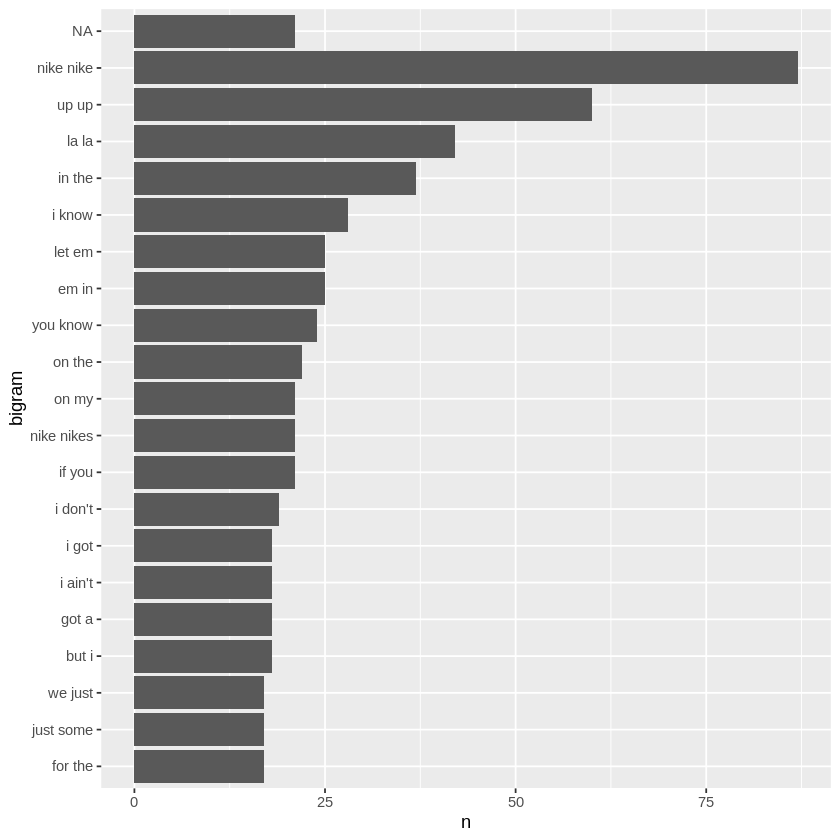

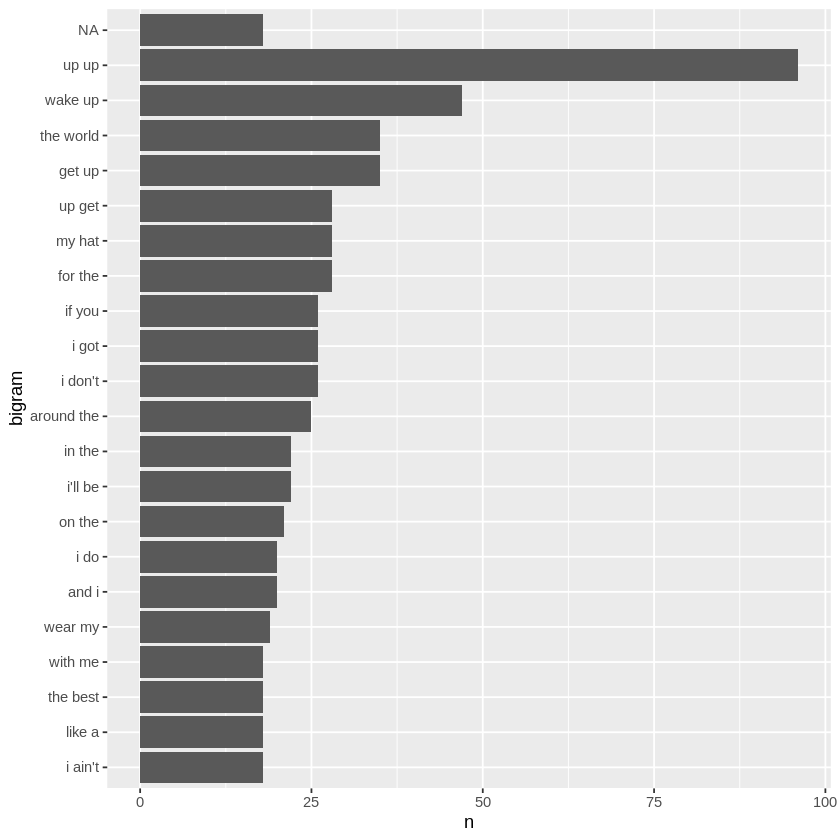

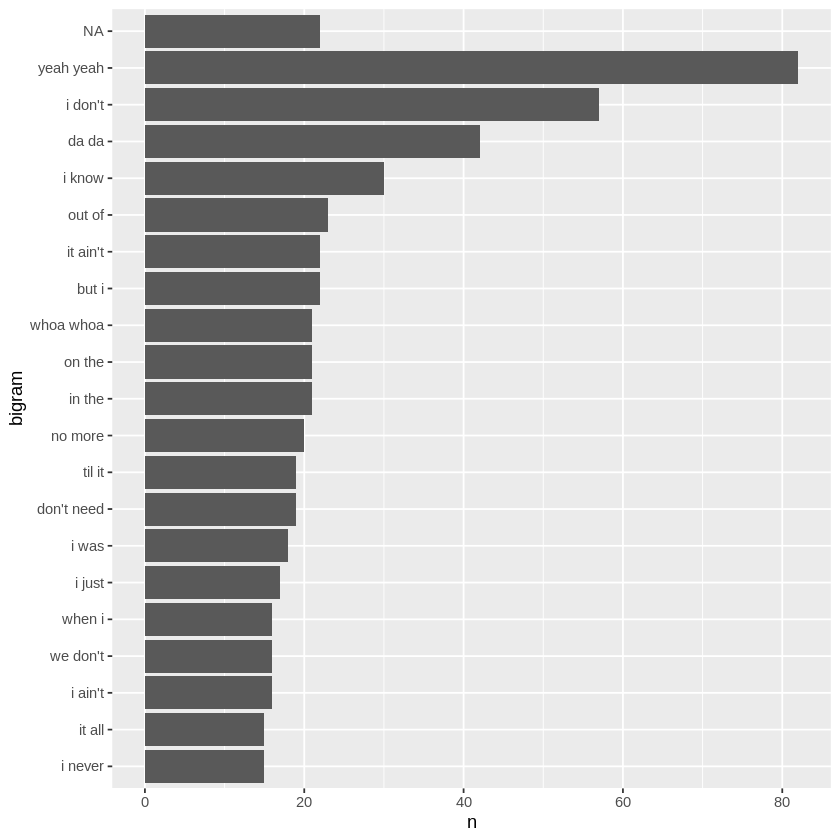

In [50]:
bigram_kids <- unnest_tokens(tbl = kids, output = bigram, input = line, token = "ngrams", n = 2, to_lower = TRUE)

bigram_bde <- unnest_tokens(tbl = bestDayEver, output = bigram, input = line, token = "ngrams", n = 2, to_lower = TRUE)

bigram_swimming <- unnest_tokens(tbl = swimming, output = bigram, input = line, token = "ngrams", n = 2, to_lower = TRUE)

kids_count <- count(bigram_kids, bigram, sort = TRUE) %>% top_n(20, wt = n) %>% mutate(bigram = reorder(bigram,n))

bde_count <- count(bigram_bde, bigram, sort = TRUE) %>% top_n(20, wt = n) %>% mutate(bigram = reorder(bigram,n))

swimming_count <- count(bigram_swimming, bigram, sort = TRUE) %>% top_n(20, wt = n) %>% mutate(bigram = reorder(bigram,n))

kids_graph <- ggplot(kids_count, aes(n,bigram)) +
    geom_col()
kids_graph

bde_graph <- ggplot(bde_count, aes(n,bigram)) +
    geom_col()
bde_graph

swimming_graph <- ggplot(swimming_count, aes(n,bigram)) +
    geom_col()
swimming_graph

or skip grams! Similarly to bigrams, it can be somewhat problematic to filter out the connector words when looking at ngrams! The graphs below do not give us very much information.

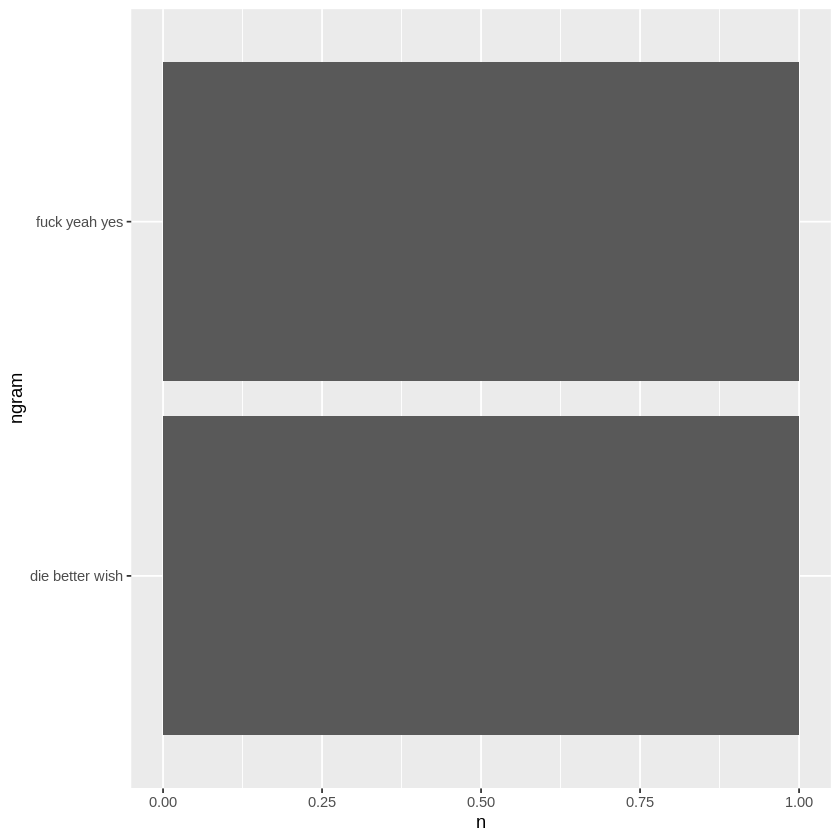

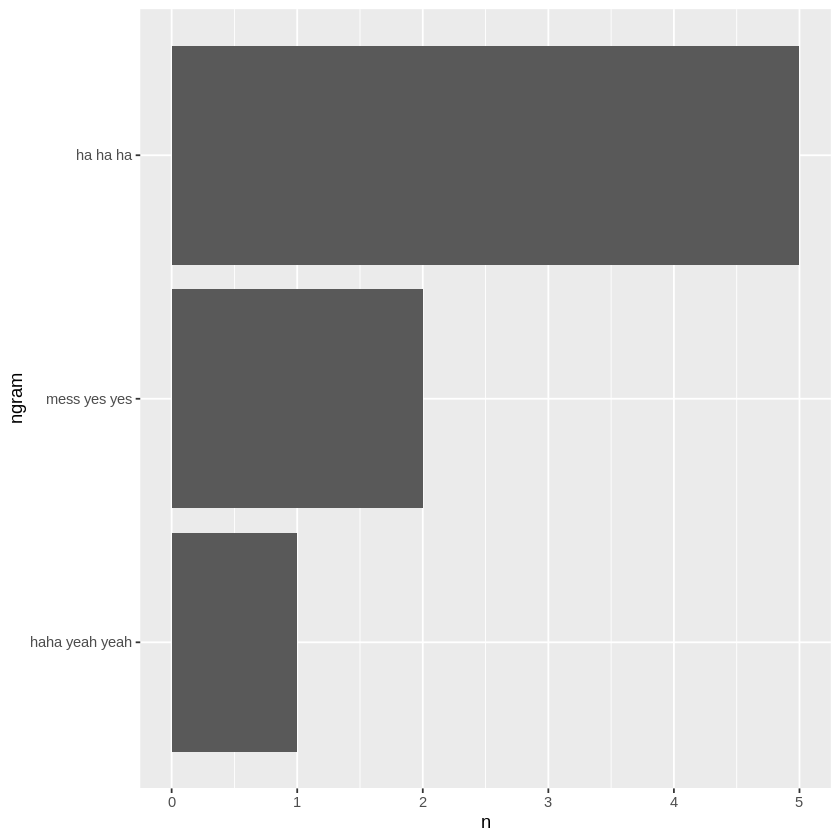

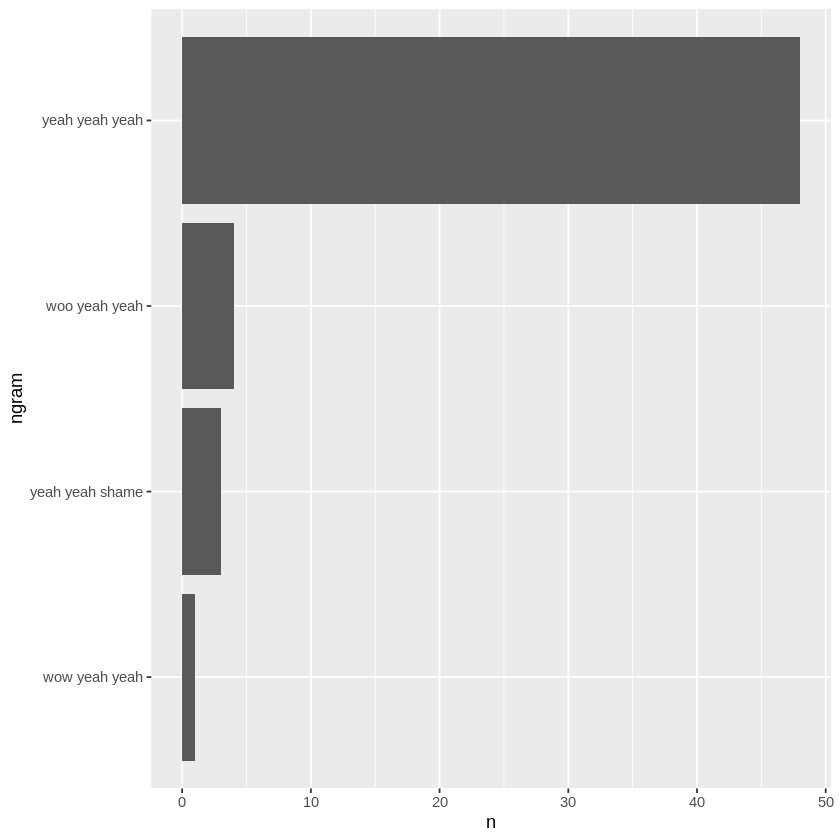

In [45]:
ngram_kids <- unnest_tokens(tbl = kids, output = ngram, input = line, token = "ngrams", n = 3, to_lower = TRUE) %>%
    separate(ngram, c("word1", "word2", "word3"), sep = " ") %>%
    filter(word1 %in% afinn$word) %>%
    filter(word2 %in% afinn$word) %>%
    filter(word3 %in% afinn$word) %>%
    unite(ngram, word1, word2, word3, sep = " ")

ngram_bde <- unnest_tokens(tbl = bestDayEver, output = ngram, input = line, token = "ngrams", n = 3, to_lower = TRUE) %>%
    separate(ngram, c("word1", "word2", "word3"), sep = " ") %>%
    filter(word1 %in% afinn$word) %>%
    filter(word2 %in% afinn$word) %>%
    filter(word3 %in% afinn$word) %>%
    unite(ngram, word1, word2, word3, sep = " ")

ngram_swimming <- unnest_tokens(tbl = swimming, output = ngram, input = line, token = "ngrams", n = 3, to_lower = TRUE) %>%
    separate(ngram, c("word1", "word2", "word3"), sep = " ") %>%
    filter(word1 %in% afinn$word) %>%
    filter(word2 %in% afinn$word) %>%
    filter(word3 %in% afinn$word) %>%
    unite(ngram, word1, word2, word3, sep = " ")

kids_count <- count(ngram_kids, ngram, sort = TRUE) %>% top_n(20, wt = n) %>% mutate(ngram = reorder(ngram,n))

bde_count <- count(ngram_bde, ngram, sort = TRUE) %>% top_n(20, wt = n) %>% mutate(ngram = reorder(ngram,n))

swimming_count <- count(ngram_swimming, ngram, sort = TRUE) %>% top_n(20, wt = n) %>% mutate(ngram = reorder(ngram,n))

kids_graph <- ggplot(kids_count, aes(n,ngram)) +
    geom_col()
kids_graph

bde_graph <- ggplot(bde_count, aes(n,ngram)) +
    geom_col()
bde_graph

swimming_graph <- ggplot(swimming_count, aes(n,ngram)) +
    geom_col()
swimming_graph

And here are the the top phrases when we look at the unfiltered data frame. As you can see, there is a lot more to look at here than in the filtered ngram graph.

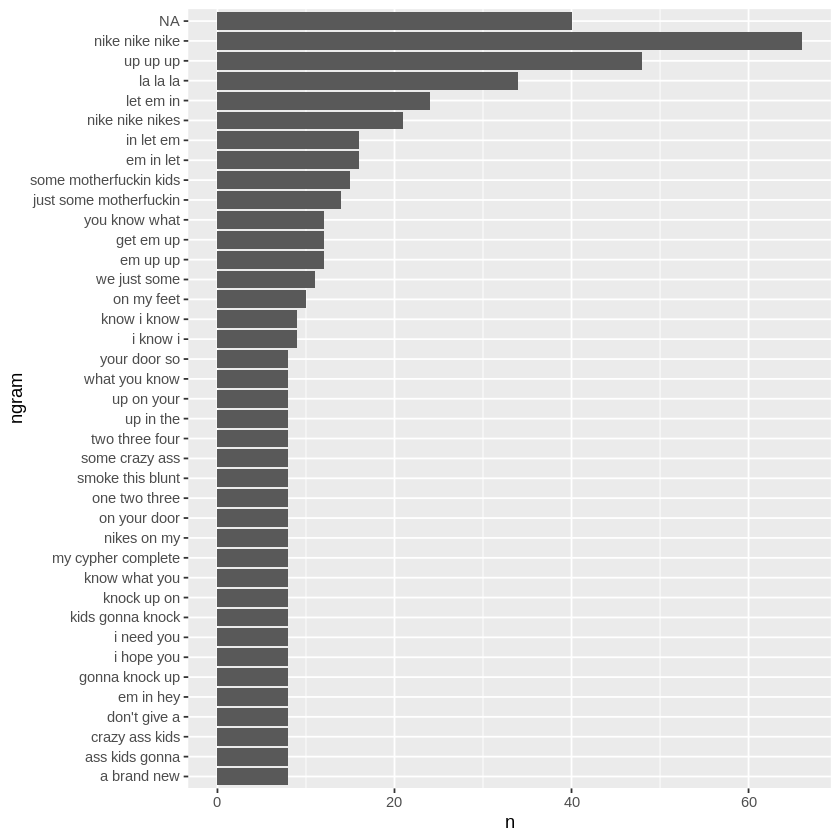

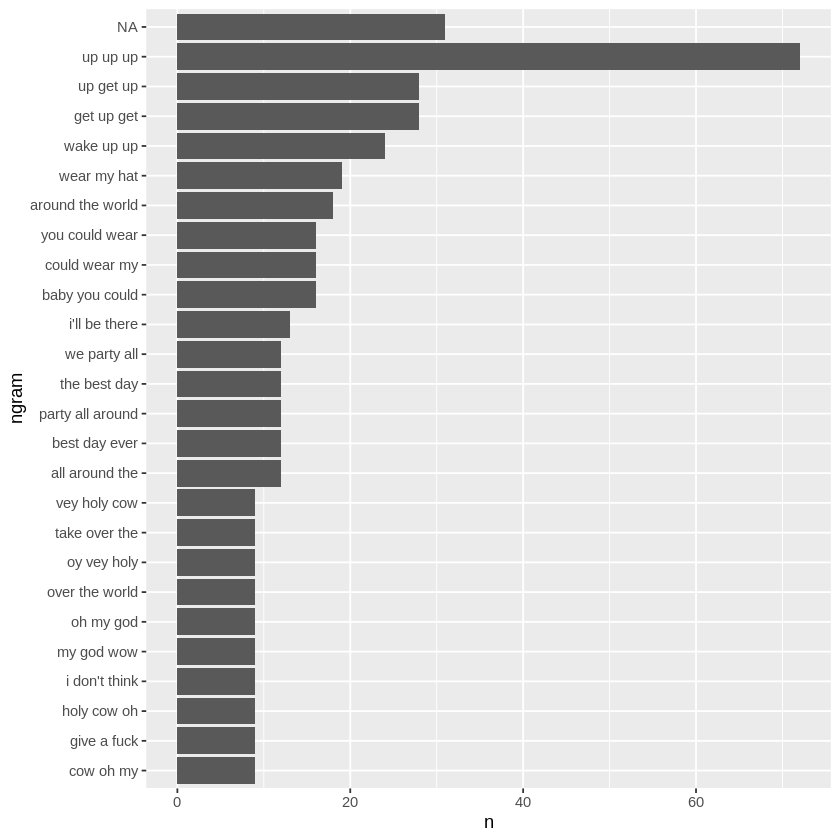

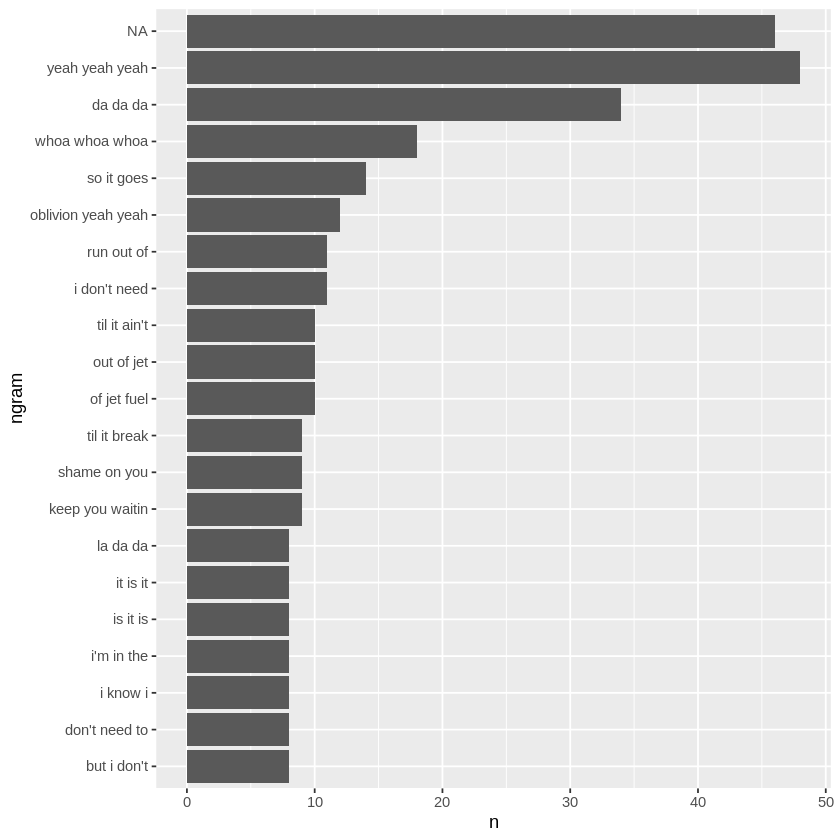

In [51]:
ngram_kids <- unnest_tokens(tbl = kids, output = ngram, input = line, token = "ngrams", n = 3, to_lower = TRUE)

ngram_bde <- unnest_tokens(tbl = bestDayEver, output = ngram, input = line, token = "ngrams", n = 3, to_lower = TRUE)

ngram_swimming <- unnest_tokens(tbl = swimming, output = ngram, input = line, token = "ngrams", n = 3, to_lower = TRUE)

kids_count <- count(ngram_kids, ngram, sort = TRUE) %>% top_n(20, wt = n) %>% mutate(ngram = reorder(ngram,n))

bde_count <- count(ngram_bde, ngram, sort = TRUE) %>% top_n(20, wt = n) %>% mutate(ngram = reorder(ngram,n))

swimming_count <- count(ngram_swimming, ngram, sort = TRUE) %>% top_n(20, wt = n) %>% mutate(ngram = reorder(ngram,n))

kids_graph <- ggplot(kids_count, aes(n,ngram)) +
    geom_col()
kids_graph

bde_graph <- ggplot(bde_count, aes(n,ngram)) +
    geom_col()
bde_graph

swimming_graph <- ggplot(swimming_count, aes(n,ngram)) +
    geom_col()
swimming_graph